# Transformadas de Fourier Discretas (DFT)

## Series de Fourier

En Física Computacional, utilizamos series de Fourier como una metodología para calcular transformadas de Fourier.

Podemos escribir cualquier función periódica $f$ con periodo $L$ en el intervalo $[0, L]$ como una serie de Fourier. La expansión resultante da lugar a
\begin{align}
f(x) = \sum_{k=0}^{\infty}\left[\alpha_k \cos\left(\frac{2\pi k x}{L}\right) + \beta_k\sin\left(\frac{2\pi k x}{L}\right)\right].
\end{align}
En esta expresión, $k$ se conoce como número de onda y $\alpha_k, \beta_k$ son los coeficientes de la expansión. De forma compacta, esta expresión se puede manipular utilizando las versiones exponenciales complejas de las funciones ${\rm{sin}}(x)$ y ${\rm{cos}}(x)$, para escribir
\begin{align}
f(x) = \sum_{k=-\infty}^{\infty} \gamma_k \exp\left(i\frac{2\pi k x}{L}\right),
\end{align}
donde
\begin{align}
\gamma_k & = \frac{\alpha_{-k} + i\beta_{-k}}2 & \forall\quad k<0,\\
\gamma_k & = \alpha_0 & \text{si}\quad k=0,\\
\gamma_k & = \frac{\alpha_{k} - i\beta_{k}}2 & \forall\quad k>0,
\end{align}
de donde podemos obtener
\begin{align}
\forall k, \quad \gamma_k = \frac{1}{L}\int_0^L {\rm d}x f(x)\exp\left(-i\frac{2\pi k x}{L}\right).
\end{align}
Esta última expresión es una consecuencia de la ortogonalidad de las funciones ${\rm{sin}}(x)$ y ${\rm{cos}}(x)$. La condición de ortogonalidad para estas funciones está dada por
\begin{align}
& \int_0^L {\rm d}x \sin\left(\frac{\pi n x}{L}\right)\sin\left(\frac{\pi m x}{L}\right) = \frac{L}2 \delta_{nm}, \\
& \int_0^L {\rm d}x \cos\left(\frac{\pi n x}{L}\right)\cos\left(\frac{\pi m x}{L}\right) = \frac{L}2 \delta_{nm},\\
& \int_0^L {\rm d}x \sin\left(\frac{\pi n x}{L}\right)\cos\left(\frac{\pi m x}{L}\right) = 0.
\end{align}

<div>
<img src="Fig1.png" width="750"/>
</div>

Para funciones no periodicas, la expansión se puede realizar sobre cierto intervalo $[0, L]$ determinado mientras que el resto se descarta como se expresa en la figura. Las líneas negras sólidas representan la función de interés, mientras que las líneas punteadas son réplicas en los intervalos determinados que no son consideradas en nuestro análisis.

De esta forma, cualquier función aún no periódica puede ser expandida en series de Fourier.

## Transformadas de Fourier

Que ocurre en el límite $L \to \infty$? En este caso, la separación entre números de onda también tiende a cero:
\begin{align}
\frac{2\pi (k+1) x}{L} - \frac{2\pi k x}{L} = \frac{2\pi x}{L} \to 0,
\end{align}
esto implica que las sumas discretas se pueden extender a a integrales tal que
\begin{align}
f(x) = \sum_{k=-\infty}^\infty \gamma_k {\rm{e}}^{2\pi i \nu_k x} \to \int_{-\infty}^\infty {\rm{d}}\nu \hat{f}(\nu){\rm{e}}^{-2\pi i \nu x},
\end{align}
donde $\nu_k = k / L$ (en el caso discreto) y $\nu$ (en el caso contínuo) son el número de onda de **cada componente de Fourier** y $\hat{f}(\nu)$ es la **transformada de Fourier** de $f(x)$ en el espacio dual de números de onda. 

Las transformadas de Fourier también se realizan en el espacio temporal, en el cual su espacio dual es el espacio de frecuencias.

La transformada de Fourier es invertible tal que
\begin{align}
\hat f(\nu) = \int_{-\infty}^\infty {\rm{d}}x f(x){\rm{e}}^{2\pi i \nu x}.
\end{align}
La forma en que se definen las transformadas de Fourier depende del campo de estudio (Matemáticas, Física...) en particular en lo que respecta a factores de $2\pi$. Para efectos de nuestra clase, las definimos según las ecuaciones anteriores.

## Transformada de Fourier Discreta

Discretizar la transformada de Fourier involucra la operación de pasar del diferencial a una variable discreta ${\rm{d}x} \rightarrow \Delta_x$, tal que $x \rightarrow = x_0 + k\Delta_x$ con $0 \leq k \lt N$. Básicamente, esto implica una suma de Riemann en la integral tal que
\begin{align}
\hat f(\nu) = \int_{-\infty}^\infty {\rm{d}} x f(x) {\rm{e}}^{2\pi i \nu x} \approx \sum_{k = 0}^{N-1}f(x_k)\text e^{2 i\pi\nu x_k} \Delta_x.
\end{align}

A pesar de que conocemos mejores formas de discretizar una integral, la forma más básica nos permite ilustrar las propiedades de la transformada de manera conceptual. **La implementación como tal difiere ligeramente**, como veremos más adelante.

La variable dual (frecuencia o número de onda) también se discretiza como resultado $\nu_n = n / N$. 

La discretización también involucra acotar la integral en un espacio finito! Esto es importante, debido a que la resolución de nuestra transformada va a estar dada por este intervalo.

## Escogencia del intervalo

Nuestro desarrollo es tal que convertimos una función continua definida en el eje real a una función periódica en el intervalo $0 \leq x \lt N\Delta_x$. Para resolver todos los detalles, o los detalles más importantes de una función dada, debemos tener cuidado con la escogencia de nuestro intervalo de discretización.

* Para funciones periódicas: se toma un número entero de periodos. En teoría, un periodo es suficiente; sin embargo, algunas señales pueden tener fluctuaciones o pequeñas condiciones de aperiodicidad que pueden dar lugar a efectos importantes en el espectro dual.
* Para funciones que decaen a cero en el límite infinito: se debe tomar un intervalo lo suficientemente ancho tal que la función ha decaído lo suficiente en las fronteras.
* Para funciones que contienen información en intervalos excesivamente grandes (e.g., funciones estocásticas): en este caso, se escoge un intervalo lo suficientemente grande para resolver las propiedades de la transformada que queremos analizar. Se debe tomar en cuenta cuales propiedades no se están considerando debido a la discretización.

En general:
* Queremos capturar valores altos en el espacio dual? (altas frecuencias, números de onda): requerimos hacer $\Delta_x$ más pequeño
* Queremos capturar valores pequeños en el espacio dual? (bajas frecuencias, números de onda): requerimos hacer el intervalo $N\Delta_x$ más grande

## Implementación de la DFT

Para esto debemos considerar las ecuaciones que dan lugar a los coeficientes de Fourier $\gamma_k$.

* Dividimos el intervalo $[0, L]$ en $N$ segmentos y utilizamos la regla de trapezoides y la periodicidad de la función:
\begin{align}
\gamma_k & = \frac1L \int_0^L {\rm{d}}x f(x)\exp\left(-i\frac{2\pi k x}{L}\right) \\
         & \approx \frac1L \frac{L}N\left[\frac12 f(0) + \frac12 f(L) + \sum_{n=1}^{N-1} f(x_n) \exp\left(-i\frac{2\pi k x_n}{L}\right) \right] \\
         & = \frac1N \left[\sum_{n=0}^{N-1} f(x_n) \exp\left(-i\frac{2\pi k n}{N}\right) \right] \quad \text{dado que }f(0) = f(L)\text{ y }\frac{x_n}{L} = \frac{n}{N}.
\end{align}

Ahora definimos la Transformada de Fourier Discreta (DFT) de la siguiente forma:
\begin{align}
y_k = f(x_k); \qquad c_k = N\gamma_k;
\end{align}
La ecuación de la DFT es
\begin{align}
\boxed{\displaystyle c_k = \sum_{n=0}^{N-1}y_n \exp\left(-i\frac{2\pi kn}{N}\right)}
\end{align}

Lo primero en lo que podemos pensar es en si podemos mejorar esta aproximación, por ejemplo considerando otros métodos de integración más sofisticados (e.g., cuadratura Gaussiana). En general, esto **no es una buena idea** a menos a que dicho método preserve las simetrías necesarias para la dualidad de los espacios y este no es siempre el caso con métodos de integración alternativos.

Curiosamente, nuestra expresión es **exacta** y esto se puede probar de forma analítica (ver la siguiente celda con respecto a la transformada de Fourier inversa).

Note que en nuestro análisis, basta con conocer los coeficientes de Fourier para conocer la transformada. Por esta razón, la expresión encasillada anterior se conoce como la transformada de Fourier discreta.

Con la expresión considerada, las propiedades de $\exp(-2i\pi kn/N)$ nos permite evaluar de manera directa
* la transformada inversa
* la transformada de Fourier rápida (FFT), que consideraremos más adelante.

Una propiedad importante de nuestra ecuación de la DFT es la siguiente: si $y(x)\in \mathbb{R}$, entonces
\begin{align}
c_{N-k} = \sum_{n=0}^{N-1}y_n \exp\left(-i\frac{2\pi (N-k)n}{N}\right) =  \sum_{n=0}^{N-1}y_n \underbrace{\text e^{-i 2\pi n}}_{=1}\exp\left(+i\frac{2\pi kn}{N}\right) = c_k^{*},
\end{align}
Lo cual implica $c_{N-k} = c_k^*$.

De esta forma, si $y(x)\in \mathbb{R}$, entonces **solo necesitamos $N/2 + 1$ (si $N$ es par) o $(N+1)/2$ (si $N$ es impar) puntos para evaluar la DFT!**.

En Python, la expresión `N//2 + 1` nos da este resultado:

In [1]:
N = 9
N//2 + 1

5

## Transformada de Fourier inversa

La operación inversa de la transformada de Fourier también es muy importante. 

Consideremos la siguiente operación:
\begin{align}
\sum_{k=0}^{N-1}c_k \exp\left(i\frac{2\pi kn}{N}\right) & = \sum_{k=0}^{N-1}\sum_{p=0}^{N-1} y_p \exp\left(-i\frac{2\pi kp}{N}\right)\exp\left(i\frac{2\pi kn}{N}\right) \\
    &= \sum_{k=0}^{N-1}\sum_{p=0}^{N-1} y_p \exp\left(i\frac{2\pi k(n-p)}{N}\right) \\
    &= \sum_{p=0}^{N-1} y_p \sum_{k=0}^{N-1}\exp\left(i\frac{2\pi k(n-p)}{N}\right)
\end{align}

Esta expresión se puede simplificar utilizando una serie geométrica
\begin{align}
\forall a\in \mathbb C, \quad \sum_{k=0}^{N-1} a^k = \frac{1-a^N}{1-a}.
\end{align}
Utilizando $a = \exp(+i2\pi m/N)$ tenemos
\begin{align}
\sum_{k=0}^{N-1} \exp\left(+i\frac{2\pi k m}N\right) = \frac{1-\exp(i2\pi m)}{1-\exp(i2\pi m/N)}.
\end{align}
Podemos notar que para $m\in\mathbb N$
\begin{align}
\Rightarrow 1-\exp(i2\pi m) = 0,
\end{align}
es decir, **el numerador siempre es 0**. La única excepción es cuando $m = 0$ o un múltiplo de $N$, en cuyo caso el denominador también es cero y debemos tener cuidado para no evaluar la expresión indefinida $0/0$. Sin embargo, en este casos podemos evaluar la suma original de forma directa (sin recurrir a la serie geométrica). Trivialmente, para estos casos obtenemos $\sum_{k=0}^{N-1} 1 = N$. Por lo tanto
\begin{align}
\sum_{k=0}^{N-1} \exp\left(+i\frac{2\pi k m}N\right) = \begin{cases} N \quad {\rm{Si}}\; m=0\; {\text{o un múltiplo de}}\; N \\ 0 \quad \text{de otra forma.} \end{cases}
\end{align}
De esta forma, la suma interna de la doble suma anterior es $N$ cuando $p = n$ y cero de otra forma, entonces
\begin{align}
\sum_{p=0}^{N-1} y_p \sum_{k=0}^{N-1}\exp\left(i\frac{2\pi k(n-p)}{N}\right) = y_n \sum_{k=0}^{N-1}\exp\left(i\frac{2\pi k(n-n)}{N}\right) = Ny_n.
\end{align}
Por lo tanto, la **transformada de Fourier inversa** es
\begin{align}
\boxed{\displaystyle y_n = \frac1N \sum_{k=0}^{N-1}c_k \exp\left(i\frac{2\pi kn}{N}\right)}.
\end{align}
Note que **no hay error de aproximación!** este resultado es exacto a nivel de precisión de máquina. Lo que ocurre es algo así como cancelación de errores pero funciona gracias a la regla de trapezoides.

# Transformadas de Fourier Rápidas (FFTs)

Las simetrías presentes en la transformada de Fourier dan la impresión de que se pueden realizar opmitizaciones. 

Tenemos
$$\qquad c_k = \sum_{n=0}^{N-1} y_n \exp\left(-i\frac{2\pi k n}{N}\right),$$
según lo descrito en las celdas anteriores. Ingenuamente, esto requiere implementar rutinas de la forma

`for k in range(N//2+1):  
    for n in range(N):  
        c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)`

Es decir, el algoritmo requiere $\sim N^2$ operaciones. El límite en este tipo de operaciones es tal que $N \sim 32000$, el cual es un número muy pequeño para muchas aplicaciones comunes.

* La FFT es un algoritmo para mejorar el orden de magnitud de las operaciones requeridas para evaluar la DFT, propuesto por Cooley & Tukey en los '60s, con la idea principal de Gauss en 1805.
* Existen diversas implementaciones, estudiaremos la versión histórica basada en el algoritmo de "dividir y conquistar".

## Estrategia de "dividir y conquistar"

El truco es considerar valores de $N$ tal que sean potencias de 2, $N = 2^M$. Realizamos la siguiente división:
$$\text{Dividimos}\qquad c_k = \sum_{n=0}^{N-1} y_n \exp\left(-i\frac{2\pi k n}{N}\right) = E_k + \omega^k O_k,$$
donde
\begin{align}
E_k & = \sum_{p=0}^{N/2-1} y_{2p} \exp\left(-i\frac{2 p\pi k }{N/2}\right)\quad \text{los índices pares } (n=2p),\\
O_k & = \sum_{p=0}^{N/2-1} y_{2p+1} \exp\left(-i \frac{2p\pi k}{N/2}\right)\quad \text{los índices impares y}\\
\omega & = \text e^{-i2\pi /N},\quad\omega^k = \text e^{-i2\pi k/N}\quad \text{es el "factor de giro"}.
\end{align}

Los términos $E_k$ y $O_k$ representan las DFTs sobre los puntos separados en divisiones dos veces mayor que las separaciones originales)
* El número de operaciones, en este caso, para cada $E_k$ y $O_k$ es $\approx (N/2)^2$
* De esta forma, el número total de operaciones para calcular la DFT es $2\times (N/2)^2 + 2 \approx N^2/2+2$, sin contar las operaciones de la bisección y el cálculo del factor de giro. Sin embargo, **para valores de $N$ grandes, el número de operaciones es mucho menor haciendo la bisección!**

Esto se logra con **una sola bisección**. Que pasa si lo hacemos de nuevo, dividiendo $E_k$ y $O_k$ en bisseciones de nuevo? Existe un límite de cuántas veces podemos hacer bisecciones? Esta es la razón por la cual escogemos valores de $N = 2^M$.

Cuantas veces podemos hacer bisecciones de manera tal que el último punto sea solamente un término?
* Si $N=8=2^3$, lo podemos hacer $3 = \log_2(8)$ veces
* Si $N=16=2^4$, lo podemos hacer $4 = \log_2(16)$ veces
* $\cdots$
* Si $N=2^M$, lo podemos hacer $M = \log_2(N)$ veces.

Si consideramos $N=2^M$, luego de $M = \log_2(N)$ bisecciones obtenemos $N$ DFTs para un solo valor de nuestra muestra, i.e.,
$$c_0 =  \sum_{n=0}^{1-1}y_n\text e^{-i 2\pi k n/N} = y_0,$$,
el valor de la DFT en el punto de la muestra.

Esta es la ideología detrás de la FFT, a pesar de que existen distintas implementaciones. 

**El número total de operaciones de una FFT es $N\log_2(N)$, el cual es un número muchísimo más pequeño que el de la implementación original $N^2$**, particularmente para valores grandes de $N$. 

Por ejemplo, para $N=10^6$, la implementación natural requiere de $O(N^2) = 10^12$ operaciones, mientras que la FFT requiere $O(N\log_2(N)) \sim 2 \times 10^7$ operaciones.

**No existe un algoritmo más eficiente para realizar esta operación**, con excepción de nuevos algoritmos emergentes en la computación cuántica.

La transformada inversa (usualmente denotada por iFFT) sigue las mismas reglas a las anteriores.

### Transformadas de Fourier en dos dimensiones

Para generalizar la transformada a más dimensiones lo que realizamos es muy sencillo, si la muestra se encuentra en una grilla $M \times N$, primero transformamos las $M$ filas:
$$c'_{m\ell} = \sum_{n=0}^{N-1}y_{mn}\exp\left(-i\frac{2\pi \ell n}{N}\right),$$
para luego transformar las $N$ columnas
$$c_{k\ell} = \sum_{m=0}^{M-1}c'_{m\ell}\exp\left(-i\frac{2\pi km}{M}\right) = \sum_{k=0}^{M-1}\sum_{n=0}^{N-1} y_{mn} \exp\left[-i 2\pi\left(\frac{km}{M} + \frac{\ell n}{N}\right)\right].$$

La transformada inversa está dada por
$$y_{mn} = \frac{1}{MN}\sum_{k=0}^{M-1}\sum_{\ell=0}^{N-1}c_{kl}\exp\left[i 2\pi\left(\frac{km}{N} + \frac{\ell n}{N}\right)\right].$$

En este caso, también se puede aplicar el agoritmo FFT de manera directa.

## Puntos cruciales de las DFTs

Con respecto a las DFTs:
* Las integrales se calculan con la regla de trapezoides para mantener la simetría de la transformada
* La periodicidad de la señal implica que la regla de trapezoides se simplifica
* Crucialmente, a pesar de que la regla de trapezoides no es exacta, para el cálculo de las DFTs **da lugar a resultados exactos**

Con respecto a las FFTs:
* El resultado final de la FFT es exactamente igual al de la DFT
* El cálculo es mucho más eficiente debido a un reordenamiento de los términos que constituyen la transformada
* Dicho reordenamiento es posible debido a las simetrías de las raíces unitarias de $\exp(2i\pi n/N)$
* No existe algoritmo **clásico** más eficiente (**algoritmos cuánticos prometen mejor escalabilidad**)

## Ejemplo

A nivel conceptual, las transformadas de Fourier son relativamente sencillas.
* Con base en una señal o función, la transformada la descompone en sus constituyentes del espacio dual (frecuencia, número de onda, etc)

<div>
<img src="Fig2.png" width="400"/>
</div>

Ya que conocemos los conceptos fundamentales de las transformadas de Fourier a nivel numérico, utilizaremos el pragma de este curso: utilizar bibliotecas en lugar de implementar nuestras propias funciones.

Existen muchas bibliotecas para realizar estas operaciones, e.g., `NumPy`, `SciPy`, `Intel MKL`,...

En el caso de implementaciones en `Python`, `SciPy` permite mayor control sobre la evaluación, mientras que `NumPy` permite un cálculo más directo sin considerar detalles de la implementación.

Con `NumPy`, la implementación se encuentra en el módulo `numpy.fft`. La forma en que trabaja es que si el dominio está dividido en una grilla que es una potencia de 2, se utiliza el algoritmo de FFT mientras que si este no es el caso, recae a algoritmos originales de DFT.

Consideremos el siguiente ejemplo trivial:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return np.sin(2.0 * x)

Dado que las transformadas descomponen una señal en sus componentes del espacio dual, para la función ${\rm sin}(x)$ solo existe un componente (en realidad, dos. Esto se debe a que la función es tiene paridad). Veamos:

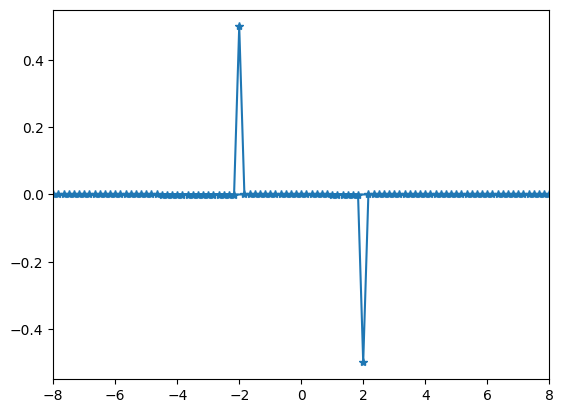

In [3]:
# Dominio de la función
# Tomamos más periodos de la función para incrementar la resolución
x_vals = np.linspace(0.0, 12.0 * np.pi, 8000)

# Transformada de Fourier
# El argumento "norm" depende de si colocamos el factor 1/N en la transformada o en su inversa
fourier_t = np.fft.fft(func(x_vals), norm="forward")

# Dominio de frecuencias/espacio dual
# Numpy nos da funcionalidad para evaluar la variable independiente
# en el espacio dual
freq = np.fft.fftfreq(len(fourier_t), d=x_vals[1]-x_vals[0])

plt.xlim(-8,8)
# Por factores de normalización, debemos escalar el resultado
plt.plot(freq*(2.0*np.pi), np.imag(fourier_t), '-*')
plt.show()

## Laboratorio

Evalúe la transformada de Fourier de la función
$$f(t) = \sum_{i=1}^{3} \epsilon_i \sin(2\pi\omega_i t),$$
donde
* $\epsilon_1 = 3.0$, $\epsilon_2 = 1.0$, $\epsilon_3 = 0.5$ 
* $\omega_1 = 1.0$, $\omega_2 = 4.0$, $\omega_3 = 7.0$

Primero realice un gráfico de la señal y luego otro de su transformada de Fourier.